In [6]:
%matplotlib inline
%load_ext autoreload
%autoreload 2|

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
from lib.tf_util.systems import system_from_str
from train_dsn import train_dsn

resdir = '/Users/sbittner/Documents/dsn/notebooks/results/rank1_rnn/';
D = 4;
T = 10;
nlayers = 5;
lr_order = -3;
c_init_order = -3;

savedir = resdir + 'rank1_rnn_D=%d_T=%d_flow=%dP_lr_order=%d_c=%d_rs=0/' % \
                   (D, T, nlayers, lr_order, c_init_order);
    
npzfile = np.load(savedir + 'results.npz');

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


Hs
(201,)
T_x
(201, 8)
mu
[ 0.96803144 -0.82802549  0.9985472   0.9985472   0.98708487  0.73562621
  1.04709651  1.0470965 ]


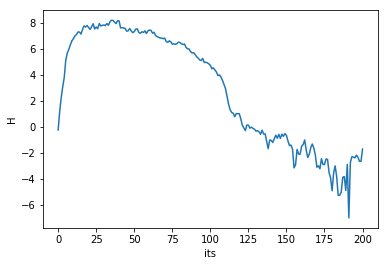

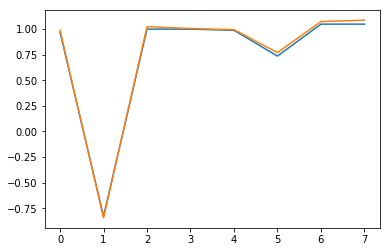

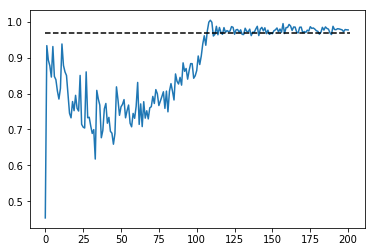

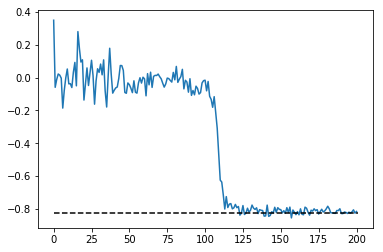

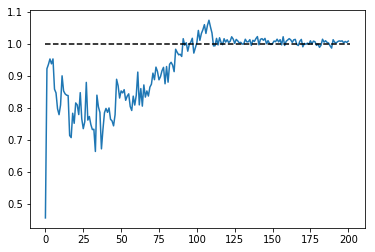

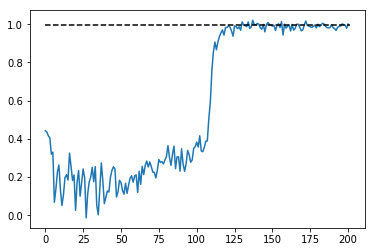

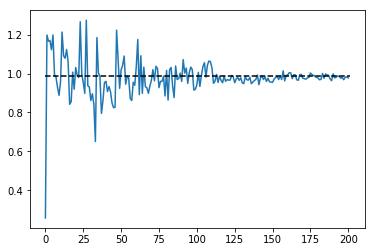

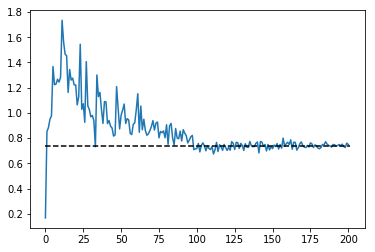

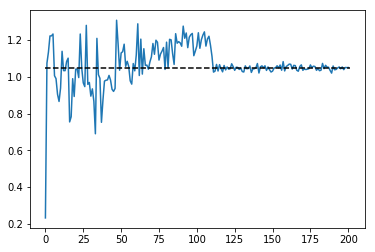

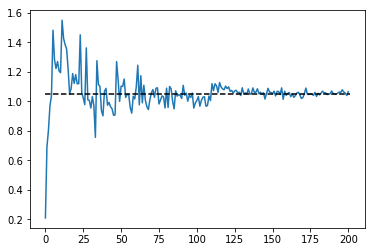

In [7]:
Hs = npzfile['Hs'];
T_xs = npzfile['T_xs'];
mu = npzfile['mu'];
print('Hs');
print(Hs.shape);
print('T_x');
print(T_xs.shape);
print('mu');
print(mu);


plt.figure();
plt.plot(Hs);
plt.xlabel('its');
plt.ylabel('H');
plt.show();

mu_len = mu.shape[0];
x_axis = np.arange(mu_len);
plt.figure();
plt.plot(x_axis, mu);
plt.plot(T_xs[140,:]);
plt.show();

for i in range(mu_len):
    plt.figure();
    plt.plot(T_xs[:,i]);
    plt.plot([0, T_xs.shape[0]], [mu[i], mu[i]], 'k--');
    plt.show();

In [158]:
if (D==2):
    phis = npzfile['phis'];
    log_q_xs = npzfile['log_q_xs'];
    print(phis.shape);
    k_max = phis.shape[0];
    figsize = (12, k_max*2);
    plt.figure(figsize=figsize);
    for k in range(k_max):
        plt.subplot(5,2,k+1);
        plt.scatter(phis[k,:,0], phis[k,:,1], c=log_q_xs[k]);
        plt.title('k=%d' % (k+1));
    plt.show();

In [159]:
if (D==2):
    k = 5;
    fig = plt.figure();
    ax = fig.add_subplot(111);
    phi = phis[k];
    log_q_x = log_q_xs[k];
    plt.scatter(phi[:,0], phi[:,1], c=log_q_x);
    plt.plot([3.5], [1.0], 'b*', markersize=18);
    
    plt.xlabel(r'$\mu_m$', fontsize=fontsize+2);
    plt.ylabel(r'$\mu_n$', fontsize=fontsize+2);

    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()


(1000, 4)


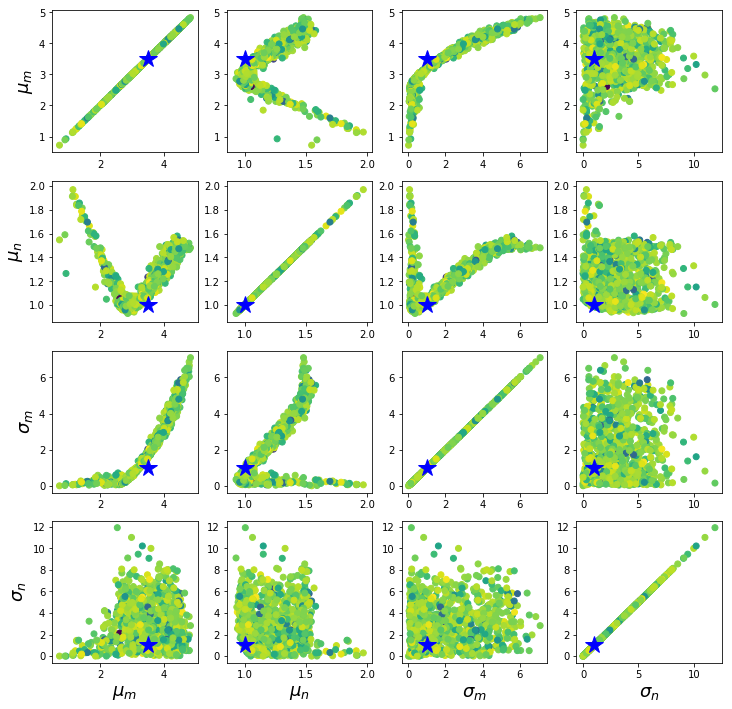

In [162]:
k = 9;
fontsize = 18;
labels = [r'$\mu_m$', r'$\mu_n$', r'$\sigma_m$', r'$\sigma_n$'];

x_val = [3.5, 1.0, 1.0, 1.0];
figsize = (12,12);
if (D==4):
    phis = npzfile['phis'][k];
    log_q_xs = npzfile['log_q_xs'][k];
    trace_hessian = npzfile['trace_hessian'][k];
    print(phis.shape);
    plt.figure(figsize=figsize);
    for i in range(D):
        for j in range(D):
            ind = i*D + j + 1;
            plt.subplot(D, D, ind);
            plt.scatter(phis[:,j], phis[:, i], c=log_q_xs);
            plt.plot(x_val[j], x_val[i], 'b*', markersize=18);
            if (i==3):
                plt.xlabel(labels[j], fontsize=fontsize);
            if (j==0):
                plt.ylabel(labels[i], fontsize=fontsize);
    #plt.colorbar();
    plt.show();

